In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data\ads.csv
data\equipements.csv
data\neighborhood_facilities.csv
data\transports.csv


In [3]:
#pd.read_csv ('/kaggle/input/real-estate-paris/transports.csv')
#pd.read_csv ('/kaggle/input/real-estate-paris/equipements.csv')
#pd.read_csv ('/kaggle/input/real-estate-paris/neighborhood_facilities.csv')

In [4]:
df = pd.read_csv ('data/ads.csv')
df

,id,description,adress,date_pub,date_update,price,fee
0,ad_1917,PARIS 17ème. AVENUE NIEL *** Vidéo disponible ...,Achat appartement 2 pièces 63 m²Paris 17e 7501...,Publiée le 4 déc. 2021,Modifiée le 30 déc. 2021,640 000 €,Honoraires à la charge du vendeur
1,ad_1454,Appartement Paris 3 pièce(s) 53 m2. Stéphane P...,Achat appartement 3 pièces 53 m²Paris 18e 7501...,Publiée le 16 déc. 2021,Modifiée le 16 déc. 2021,556 500 €,"Honoraires : 5,00% TTC inclus à la charge de l..."
2,ad_1794,Vente Appartement 2 pièces de 31m² - 75018 Par...,Achat appartement 2 pièces 31 m²Paris 18e 7501...,Publiée le 8 déc. 2021,Modifiée le 28 déc. 2021,305 000 €,Honoraires à la charge du vendeur
3,ad_1519,"A vendre, en exclusivité, dans le 11e arrondis...",Achat appartement 2 pièces 31 m²Paris 11e 7501...,Publiée le 15 déc. 2021,Modifiée le 29 déc. 2021,380 000 €,"Honoraires : 4,40% TTC inclus à la charge de l..."
4,ad_1779,"Gambetta 2 pièce(s) 40 m2. Rue d'Annam, à quel...",Achat appartement 2 pièces 40 m²Paris 20e 7502...,Publiée le 24 nov. 2021,Modifiée le 29 déc. 2021,368 000 €,"Honoraires : 5,14% TTC inclus à la charge de l..."
...,...,...,...,...,...,...,...
1870,ad_741,Appartement familial - Nation. Le Groupe H&amp...,Achat appartement 6 pièces 168 m²Paris 12e 750...,Publiée il y a plus de 2 mois,Modifiée le 29 déc. 2021,1 697 000 €,"Honoraires : 1,62% TTC inclus à la charge de l..."
1871,ad_1600,"Village de Passy - 5 pièces - 195,51 m². Villa...",Achat appartement 5 pièces 200 m²Paris 16e 750...,Publiée le 14 déc. 2021,NaN,2 370 000 €,"Honoraires : 3,04% TTC inclus à la charge de l..."
1872,ad_1441,Appartement 2 pièces de 46m² | Rue Clisson | P...,Achat appartement 2 pièces 46 m²Paris 13e 7501...,Publiée le 16 déc. 2021,NaN,441 000 €,Honoraires à la charge du vendeur
1873,ad_380,Duplex 3 pièces avec terrasse - Pernety XVIème...,Achat duplex 3 pièces 53 m²Paris 14e 75014 (Pe...,Publiée il y a plus de 2 mois,Modifiée le 18 déc. 2021,785 000 €,"Honoraires : 4,67% TTC inclus à la charge de l..."


In [5]:
df_trans = pd.read_csv ('data/transports.csv')

In [6]:
df_trans = df_trans.groupby(['ad_id','type']).size().unstack(level=1)

In [7]:
df_trans.fillna(0, inplace=True)

In [8]:
df = pd.merge(df, df_trans, right_index=True, left_on='id')

In [9]:
df.columns

Index(['id', 'description', 'adress', 'date_pub', 'date_update', 'price',
       'fee', 'bus', 'metro'],
      dtype='object')

In [10]:
df.drop(['date_pub', 'date_update', 'fee'], axis=1, inplace=True, errors='ignore')

**Dataset containe duplicate rows with unique id**

In [11]:
df.describe()

,bus,metro
count,1398.000000,1398.000000
mean,7.635193,0.534335
std,3.409107,0.563665
min,1.000000,0.000000
25%,5.000000,0.000000
50%,7.000000,1.000000
75%,10.000000,1.000000
max,22.000000,3.000000


**Finding and removing duplicate rows by adress because we can take address as id for each house**

In [12]:
pd.concat(g for _, g in df.groupby("adress") if len(g) > 1)

,id,description,adress,price,bus,metro
756,ad_1231,VILLAGE BASTILLE - Studette. Au cœur du Villag...,Achat appartement 1 pièce 10 m²Paris 11e 75011...,128 400 €,8.0,0.0
835,ad_1232,VILLAGE BASTILLE - Studette. Au cœur du Villag...,Achat appartement 1 pièce 10 m²Paris 11e 75011...,128 400 €,8.0,0.0
1218,ad_1233,VILLAGE BASTILLE - Studette. Au cœur du Villag...,Achat appartement 1 pièce 10 m²Paris 11e 75011...,128 400 €,8.0,0.0
234,ad_1646,Appartement. RUE DE MARIGNAN / CHAMPS-ELYSEE -...,Achat appartement 1 pièce 11 m²Paris 8e 75008 ...,160 000 €,10.0,1.0
249,ad_1647,Appartement. RUE DE MARIGNAN / CHAMPS-ELYSEE -...,Achat appartement 1 pièce 11 m²Paris 8e 75008 ...,160 000 €,10.0,1.0
...,...,...,...,...,...,...
270,ad_860,Mairie du XIVème: Charmant studio lumineux et ...,Achat studio 32 m²Paris 14e 75014 (Pernety),383 000 €,4.0,1.0
1084,ad_862,Mairie du XIVème: Charmant studio lumineux et ...,Achat studio 32 m²Paris 14e 75014 (Pernety),383 000 €,4.0,1.0
311,ad_1607,PARIS 2EME - MONTORGUEIL Studio cour arborée/p...,Achat studio 33 m²Paris 2e 75002 (Montorgueil ...,456 000 €,9.0,0.0
682,ad_1606,PARIS 2EME - MONTORGUEIL Studio cour arborée/p...,Achat studio 33 m²Paris 2e 75002 (Montorgueil ...,456 000 €,9.0,0.0


**removing duplicate rows by adress**

In [13]:
df = df.drop_duplicates(subset=['adress'],  keep = 'last')

still we can find description column

In [14]:
df.describe()

,bus,metro
count,433.000000,433.000000
mean,7.556582,0.551963
std,3.348183,0.571468
min,1.000000,0.000000
25%,5.000000,0.000000
50%,7.000000,1.000000
75%,10.000000,1.000000
max,22.000000,3.000000


In [15]:
pd.concat(g for _, g in df.groupby("description") if len(g) > 1)

,id,description,adress,price,bus,metro
667,ad_193,Appartement - 3 pièces - 40 m² - Paris 75018. ...,Achat appartement 3 pièces 40 m²Paris 18e 7501...,330 000 €,7.0,1.0
1342,ad_197,Appartement - 3 pièces - 40 m² - Paris 75018. ...,Achat appartement 2 pièces 40 m²Paris 18e 7501...,330 000 €,7.0,1.0
1719,ad_1625,PARIS 20 - 3 PIECES - 57m² - METRO TELEGRAPHE....,Achat appartement 3 pièces 56 m²Paris 20e 7502...,465 000 €,11.0,1.0
1779,ad_1617,PARIS 20 - 3 PIECES - 57m² - METRO TELEGRAPHE....,Achat appartement 3 pièces 56 m²Paris 19e 7501...,465 000 €,2.0,1.0


In [16]:
list(df.loc[df['id'] == "ad_193"]["adress"])

['Achat appartement 3\xa0pièces 40\xa0m²Paris 18e\xa075018 (La Chapelle - Marx Dormoy)']

In [17]:
df['district'] = df['adress'].str.extract('(\d+)e', expand=False).str.strip()

In [18]:
df['volume'] = df['adress'].str.extract('(\d+).?m²', expand=False).str.strip()

In [19]:
df['rooms'] = df['adress'].str.extract('(\d+).?[p|P][i|I]', expand=False).str.strip()

In [20]:
df.loc[df['description'].str.contains('(?i)STUDIO') & df['rooms'].isna(), 'rooms'] = 1

In [21]:
df['price'] = df['price'].str.replace(u'\xa0', '').str.replace('€', '').astype(int)

In [22]:
df[df['district'].isna() | df['volume'].isna() | df['rooms'].isna()]

,id,description,adress,price,bus,metro,district,volume,rooms
1606,ad_2104,3 PIECES - TERRASSE DE 16M2 - NOUVEAU CHAPELLE...,Achat appartement 3 piècesParis 18e 75018 (Por...,500000,12.0,1.0,18,NaN,3
1621,ad_1845,Appartement Paris 3 pièce(s) - 58 m2 - Rue Vit...,Achat appartement 3 pièces 59 m²PARIS 75020 (P...,560000,7.0,0.0,NaN,59,3


In [23]:
df.loc[1606, 'volume'] = 61
df.loc[1606, 'district'] = 18

In [24]:
df[df['district'].isna() | df['volume'].isna() | df['rooms'].isna()]

,id,description,adress,price,bus,metro,district,volume,rooms
1621,ad_1845,Appartement Paris 3 pièce(s) - 58 m2 - Rue Vit...,Achat appartement 3 pièces 59 m²PARIS 75020 (P...,560000,7.0,0.0,NaN,59,3


In [25]:
#list(df.loc[df['id'] == "ad_2104"]["adress"])

In [26]:
df[["price", "district", "volume", "rooms"]] = df[["price", "district", "volume", "rooms"]].apply(pd.to_numeric)

In [27]:
df.drop(['description', 'adress'], axis=1, inplace=True, errors='ignore')

In [28]:
df

,id,price,bus,metro,district,volume,rooms
154,ad_965,599000,7.0,1.0,18.0,62,3
302,ad_1427,650000,11.0,1.0,15.0,78,3
315,ad_869,250000,4.0,1.0,14.0,23,2
345,ad_420,295000,9.0,1.0,18.0,31,2
358,ad_1593,695000,11.0,1.0,15.0,60,3
...,...,...,...,...,...,...,...
1868,ad_412,520000,7.0,1.0,11.0,49,2
1869,ad_767,850000,7.0,0.0,11.0,80,2
1872,ad_1441,441000,6.0,0.0,13.0,46,2
1873,ad_380,785000,4.0,1.0,14.0,53,3


In [29]:
df.shape

(433, 7)

<AxesSubplot:>

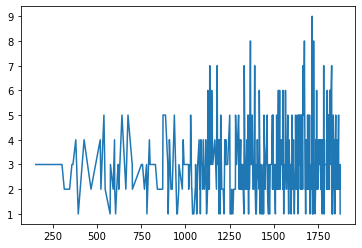

In [30]:
df["rooms"].plot()

<AxesSubplot:>

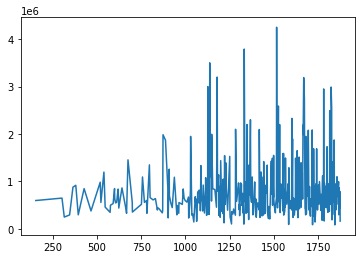

In [31]:
df["price"].plot()

<AxesSubplot:>

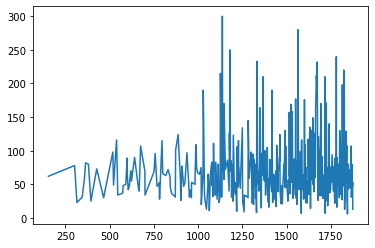

In [32]:
df["volume"].plot()

<AxesSubplot:>

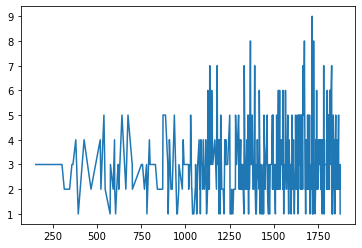

In [33]:
df["rooms"].plot()

<AxesSubplot:>

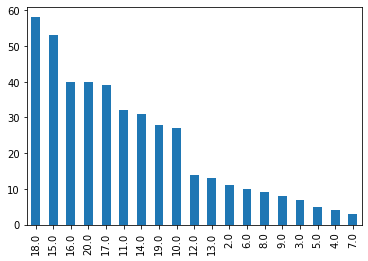

In [34]:
pd.value_counts(df['district']).plot.bar()

In [35]:
dist_group = df.groupby(['district']).mean()

<AxesSubplot:xlabel='district'>

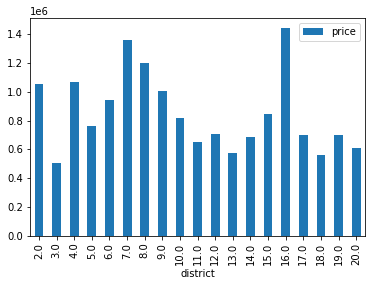

In [36]:
dist_group.plot.bar(y=["price"])

<AxesSubplot:xlabel='district'>

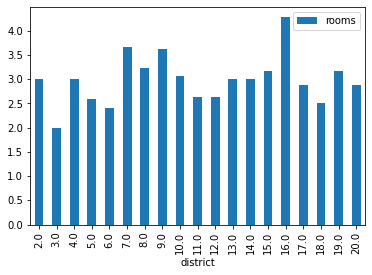

In [37]:
dist_group.plot.bar(y=["rooms"])

<AxesSubplot:xlabel='district'>

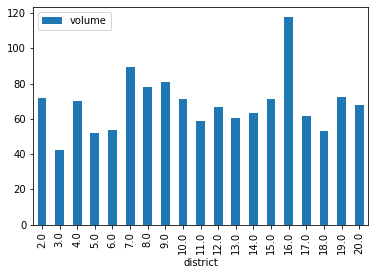

In [38]:
dist_group.plot.bar(y=["volume"])

In [39]:
df

,id,price,bus,metro,district,volume,rooms
154,ad_965,599000,7.0,1.0,18.0,62,3
302,ad_1427,650000,11.0,1.0,15.0,78,3
315,ad_869,250000,4.0,1.0,14.0,23,2
345,ad_420,295000,9.0,1.0,18.0,31,2
358,ad_1593,695000,11.0,1.0,15.0,60,3
...,...,...,...,...,...,...,...
1868,ad_412,520000,7.0,1.0,11.0,49,2
1869,ad_767,850000,7.0,0.0,11.0,80,2
1872,ad_1441,441000,6.0,0.0,13.0,46,2
1873,ad_380,785000,4.0,1.0,14.0,53,3


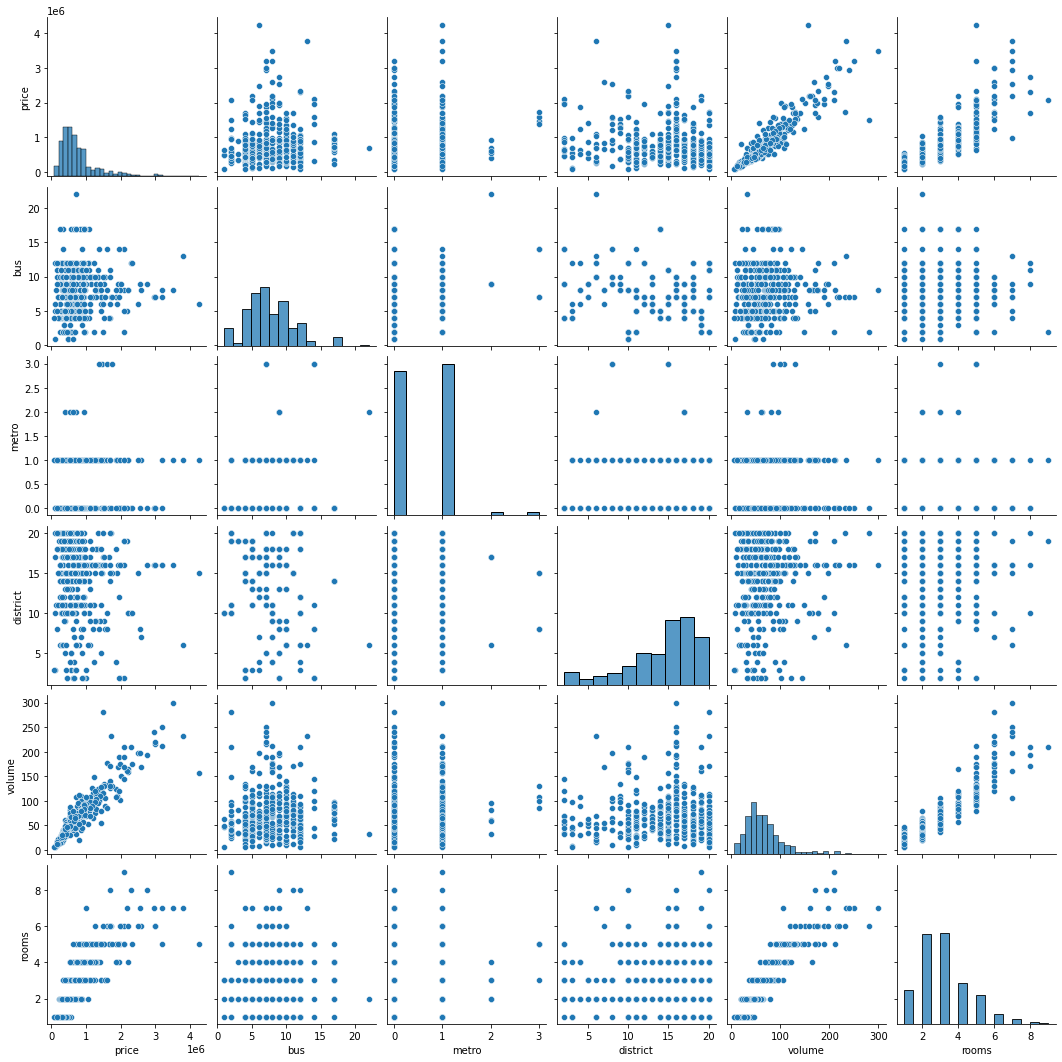

In [40]:
sns.pairplot(df)

<AxesSubplot:>

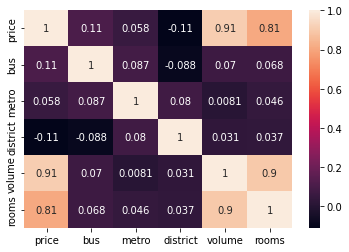

In [41]:
sns.heatmap(df.corr(), annot=True)

In [42]:
df_district = pd.get_dummies(df['district'])
df_district

,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
302,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
315,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
345,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
358,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1869,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1872,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1873,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [43]:
df.drop(['district'], axis=1, inplace=True, errors='ignore')

In [44]:
df = pd.concat([df, df_district], axis=1)

In [45]:
df.drop(['id'], axis=1, inplace=True, errors='ignore')
X = df.loc[:, df.columns != 'price']
y = df[["price"]]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [47]:
X_train

,bus,metro,volume,rooms,2.0,3.0,4.0,5.0,6.0,7.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
1221,10.0,1.0,106,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
466,7.0,1.0,30,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1302,6.0,0.0,93,4,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1339,7.0,1.0,51,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1681,8.0,0.0,75,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,4.0,1.0,20,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1703,12.0,0.0,51,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1724,11.0,1.0,171,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
522,9.0,0.0,49,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
lm = LinearRegression()

In [49]:
lm.fit(X_train, y_train)

c:\users\prasanth\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [50]:
coeff = pd.DataFrame(lm.coef_[0], X.columns, columns=["coefficient"])

In [51]:
coeff

,coefficient
bus,6347.679105
metro,43765.369206
volume,12237.806899
rooms,-17314.248292
2.0,343986.265406
3.0,105446.875145
4.0,354421.263154
5.0,333081.129409
6.0,398277.264374
7.0,412036.550426


In [52]:
predictions = lm.predict(X_test)

c:\users\prasanth\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


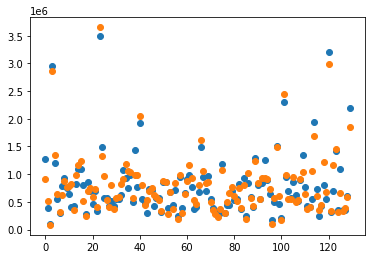

In [53]:
plt.scatter(np.arange(0,y_test.shape[0]).reshape(y_test.shape), y_test)
plt.scatter(np.arange(0,y_test.shape[0]).reshape(y_test.shape), predictions)

In [54]:
y_test.describe()

,price
count,1.300000e+02
mean,7.687116e+05
std,5.466646e+05
min,1.050000e+05
25%,4.260000e+05
50%,6.400000e+05
75%,8.966250e+05
max,3.500000e+06


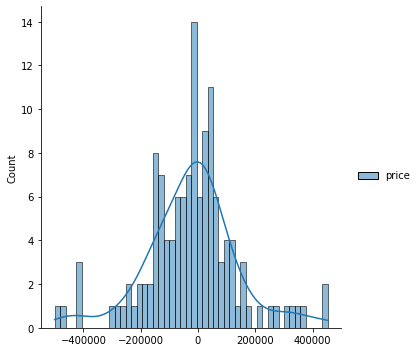

In [55]:
sns.displot((y_test - predictions), bins=50, kde=True)

In [56]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 114062.3789486279
MSE: 25851574112.690586
RMSE: 160784.2470912203


In [57]:
r2_score = lm.score(X_test.values,y_test.values)
print(r2_score*100,'%')

91.28236469624333 %


In [58]:
import pickle

In [66]:
filename = 'linear_regression_model.pickle'
#pickle.dump(lm, open(filename, 'wb'))

In [67]:
lm.predict([X_test[:].iloc[1].values])

array([[512650.35859399]])

In [68]:
X_test[:].iloc[0].values.shape

(23,)

In [69]:
y_test[:].iloc[1].values

array([388000])

In [70]:
test = pd.DataFrame(y_test)

In [71]:
test['pred'] = predictions.astype(int)

In [72]:
test

,price,pred
1461,1270000,906345
1827,388000,512650
1260,105000,83031
1781,2950000,2867702
539,1198000,1346957
...,...,...
1440,1100000,653038
1125,350000,340015
1426,345000,397433
1594,598000,579611
